# Assignment 8
----

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

### Functions / Classes
-----

In [2]:
def V(u):
    x,y = u
    return (x-y-1)**4 +abs(x+y-6)

def rho(x,y):
    #x,y = u
    
    V = (x-y-1)**4 + abs(x+y-6)
    return np.exp(-V)

def prop_dist(u, Kq):
    return np.random.multivariate_normal(u, Kq)

def MCMC(M, a, start=(0,0)):
    # covariance matrix
    Kq = [[a,0],[0,a]]

    # start poss
    u_curr = start

    # list for samples
    samples = [u_curr]
    # step count
    N = 1
    # accepted sample count
    N_samples = 1
    # continue untill wanted number of samples
    while N_samples < M:
        # new proposal point
        prop = prop_dist(u_curr, Kq)
        # log of ratio rho(prop)/rho(u_curr)
        ratio = V(u_curr) - V(prop)
        # log of accept prob
        accept_prob = min(0, ratio)

        # see if we accept new point
        if np.log(np.random.rand()) < accept_prob:
            # add new sample point
            samples.append(prop)
            # change current state of MC
            u_curr = prop

            N_samples += 1
            
        N += 1

    return samples, N,

In [3]:
# Original function
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x,y)
Z = rho(X,Y)

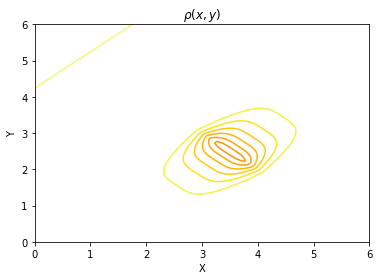

In [4]:
plt.contour(X, Y, Z, cmap = 'Wistia')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'$\rho(x, y)$')
plt.show()

## Manually tune a

In [5]:
M = 10_00
A = np.linspace(0.1, 2, 20)
acceptence_rates = {}

for a in tqdm(A):
    
    acceptence_rates[a] = []
    
    for ii in range(20):
        sample, N  = MCMC(M, a)
        acceptence_rates[a].append(M/N)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [01:24<00:00,  4.22s/it]


In [6]:
means = []
stds = []

for ii in acceptence_rates.keys():
    means.append(np.mean(acceptence_rates[ii]))
    stds.append(np.std(acceptence_rates[ii]))

In [7]:
means = np.array(means)
stds = np.array(stds)

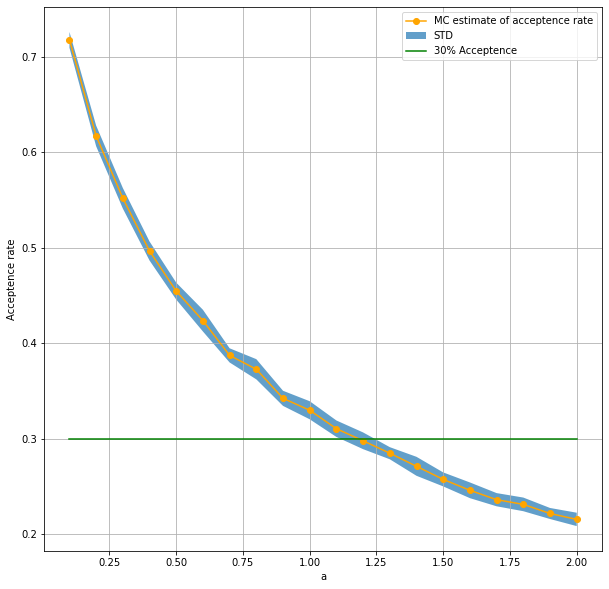

In [26]:
plt.figure(figsize = (10,10))
plt.plot(A, means, label = 'MC estimate of acceptence rate', marker = 'o', color= 'orange')
plt.fill_between(A, (means - stds), (means + stds), label = ("STD"), alpha = 0.7)

plt.plot(A, [0.30]*len(A), label = '30% Acceptence', color='green')
plt.xlabel('a')
plt.ylabel('Acceptence rate')
plt.legend()
plt.grid()
plt.savefig("figures/acceptence_rate.png", dpi=300)

## Plot the Markov Chain in 2D

In [47]:
M = 100_000
a = 1.2
sample, N  = MCMC(M, a)

In [48]:
x,y = zip(*sample)

In [30]:
sample_n = [n for n in range(1, M+1, 100)]
running_mean_x = [np.mean(x[:n]) for n in range(1,M+1, 100)]
running_mean_y = [np.mean(y[:n]) for n in range(1,M+1, 100)]

In [31]:
x_heatmap = np.array(sample).T[0][0:100]
y_heatmap = np.array(sample).T[1][0:100]

x_heatmap, y_heatmap = np.meshgrid(x_heatmap, y_heatmap)
ZZ = rho(x_heatmap, y_heatmap)

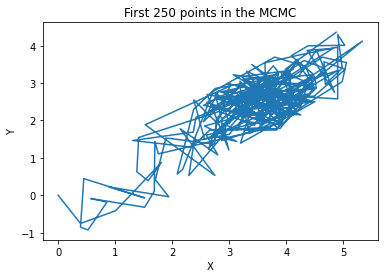

In [34]:
plt.plot(x[0:250], y[0:250])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('First 250 points in the MCMC')
plt.savefig("figures/markov_chain.png", dpi=300)

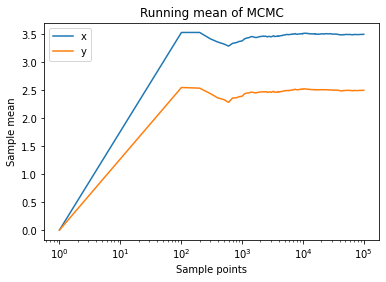

In [43]:
plt.plot(sample_n, running_mean_x, label="x")
plt.plot(sample_n, running_mean_y, label="y")
plt.xscale('log')
plt.xlabel('Sample points')
plt.ylabel('Sample mean')
plt.title('Running mean of MCMC')
plt.legend()
plt.savefig("figures/running_mean.png", dpi=300)

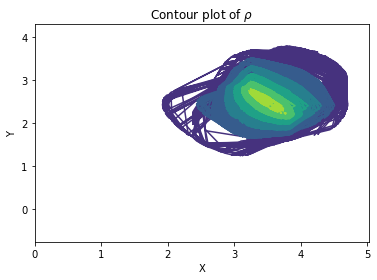

In [45]:
plt.contour(x_heatmap, y_heatmap, ZZ, )
plt.xlabel('X')
plt.ylabel('Y')
plt.title(r'Contour plot of $\rho$')
plt.savefig("figures/contour_plot.png", dpi=300)

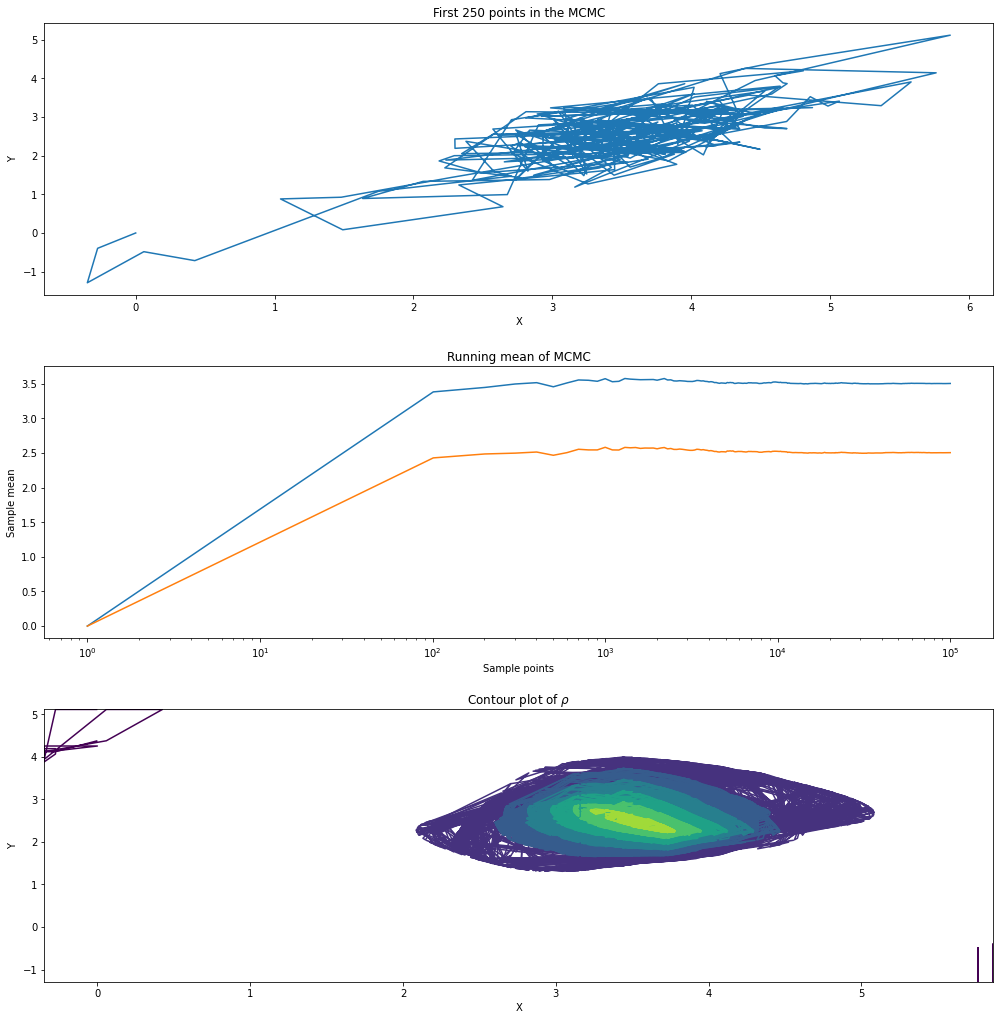

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
fig.tight_layout(pad=5.0)

# MCMC path
ax[0].plot(x[0:250], y[0:250])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('First 250 points in the MCMC')

# Running mean 
ax[1].plot(sample_n, running_mean_x)
ax[1].plot(sample_n, running_mean_y)
ax[1].set_xscale('log')
ax[1].set_xlabel('Sample points')
ax[1].set_ylabel('Sample mean')
ax[1].set_title('Running mean of MCMC')

# Contour plot
ax[2].contour(x_heatmap, y_heatmap, ZZ, )
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')
ax[2].set_title(r'Contour plot of $\rho$')

plt.show()

In [49]:
# Estimating the mean
# skip the first 10_000 samples(burn in period): See  running mean plot

In [75]:
print(np.mean(x[10_000:]))
np.std(x[10_000:])

3.502863582362922


0.8421298541906117

In [74]:
print(np.mean(y[10_000:]))
np.std(y[10_000:])

2.5023355863563608


0.841821607868088

In [61]:
# bootstrap
M=100
N=10_000
x_bar = list(x[10_000:])
y_bar = list(y[10_000:])
means_x = []
means_y = []
for m in range(M):
    random.shuffle(x_bar)
    random.shuffle(y_bar)
    means_x.append(np.mean(x_bar[:N]))
    means_y.append(np.mean(y_bar[:N]))

In [67]:
print(np.mean(means_x))
np.std(means_x)

3.5031565727089524


0.00741574095382817

In [68]:
print(np.mean(means_y))
np.std(means_y)

2.500438364378786


0.007729325956326245